# Smart bathy changes South to the Victoria island  for CREG12.L75

In [58]:
# Select the PANGEO kernel to be able to use this Notebook
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap

%matplotlib inline

>> ## Data read 

In [59]:
# Read de Domain config file
INDIR='/home/datawork-lops-drakkarcom/SIMULATION-OUTPUTS/FREDY/CONFIGS/CREG12.L75/GRID/'
ds_dfg=xr.open_dataset(INDIR+'bathymetry_CREG12_V3.3_CT20180612Larger_ct20190102.nc')

In [60]:
ds_dfg

<xarray.Dataset>
Dimensions:     (x: 1580, y: 1801)
Dimensions without coordinates: x, y
Data variables:
    Bathymetry  (y, x) float32 ...
    nav_lon     (y, x) float32 ...
    nav_lat     (y, x) float32 ...
Attributes:
    History:  Based on bathymetry_CREG12_V3.3_CT20180612Larger_CT20160208_vh2...

In [68]:
ds_out=xr.Dataset()  
ds_out['Bathymetry']= (('y','x'),ds_dfg['Bathymetry'].copy())
ds_out.coords['nav_lon']= (('y','x'),ds_dfg['nav_lon'].values)
ds_out.coords['nav_lat']= (('y','x'),ds_dfg['nav_lat'].values)

# Bathy changes
ds_out['Bathymetry'][1217,188]=50.
ds_out['Bathymetry'][1215:1221,186]=50.

ds_out.attrs={'History':'This version relies on bathymetry file: bathymetry_CREG12_V3.3_CT20180612Larger_ct20190102.nc',\
             'Adds':'deepen few grid point located south to the Victoria island in a narrow strait'}
ds_out.to_netcdf(INDIR+'bathymetry_CREG12_V3.3_REF09.nc')

In [62]:
ds_out

<xarray.Dataset>
Dimensions:     (x: 1580, y: 1801)
Coordinates:
    nav_lon     (y, x) float32 -93.66704 -93.58371 ... 102.04508 101.97702
    nav_lat     (y, x) float32 25.583187 25.583206 ... 55.075264 55.05175
Dimensions without coordinates: x, y
Data variables:
    Bathymetry  (y, x) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
Attributes:
    History:  Based on bathymetry file: bathymetry_CREG12_V3.3_CT20180612Larg...
    Adds:     deepen few grid point located south to the Victoria island in a...

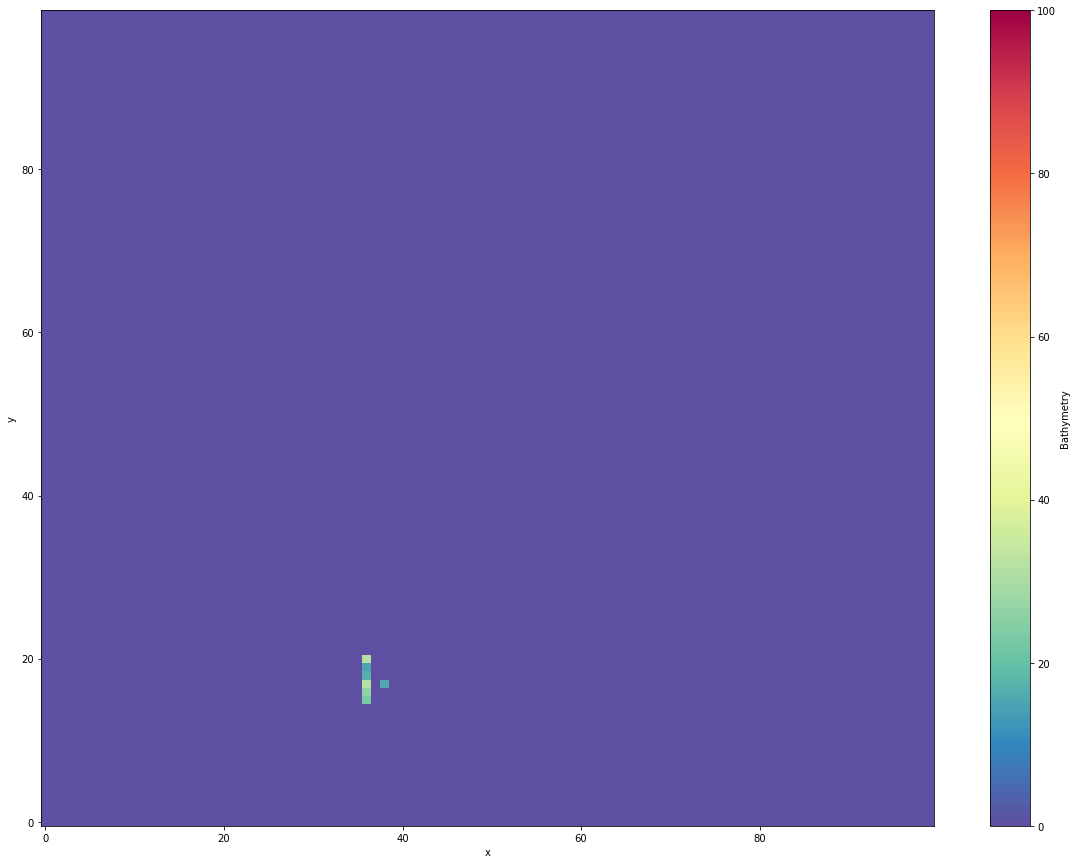

In [67]:
plt.figure(figsize=(20,15))
(ds_out['Bathymetry']-ds_dfg['Bathymetry']).isel(x=slice(150,250),y=slice(1200,1300)).plot(vmax=100,cmap='Spectral_r')

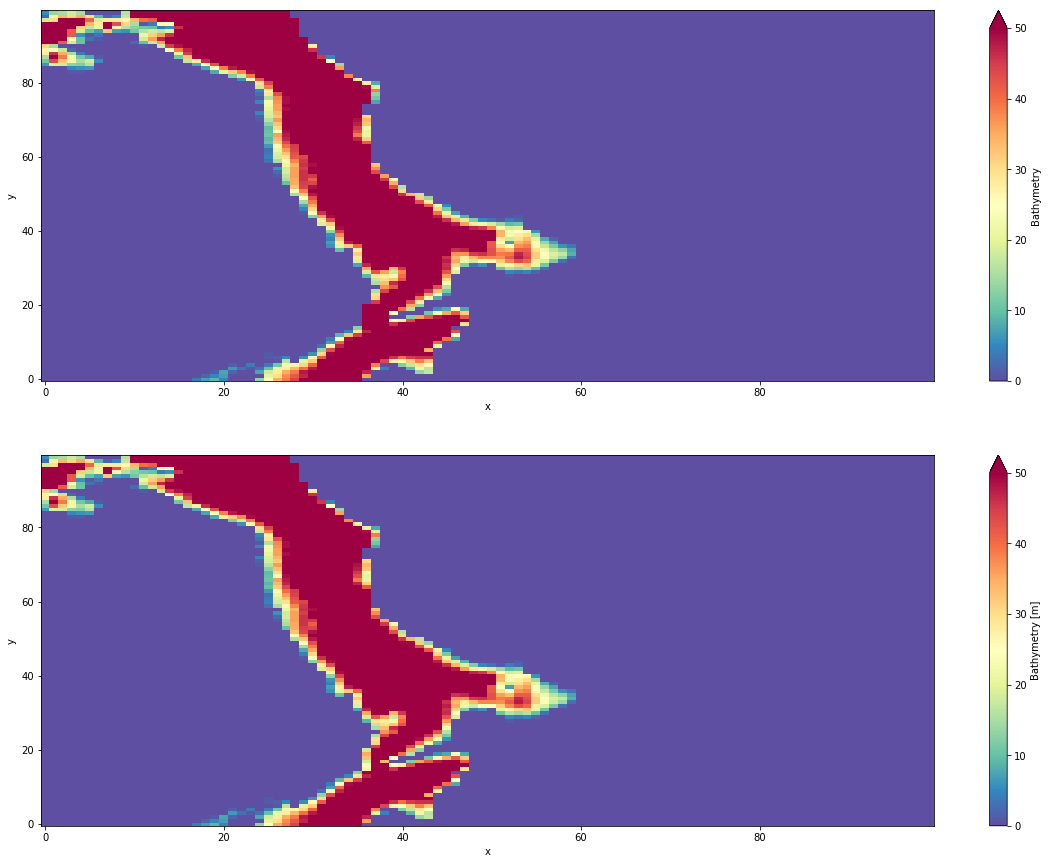

In [65]:
plt.figure(figsize=(20,15))
plt.subplot(211)
(ds_out['Bathymetry'].isel(x=slice(150,250),y=slice(1200,1300))).plot(vmax=50,cmap='Spectral_r')

plt.subplot(212)
(ds_dfg['Bathymetry'].isel(x=slice(150,250),y=slice(1200,1300))).plot(vmax=50,cmap='Spectral_r')